# 3D-визуализация графики для машинного обучения

3D-визуализация объектов может быть полезна для создания данных изображений при решении задач компьютерного зрения.

Реальная распечатка 3D-изображений также может являться дополнительным источником данных с целью создания фотографий под разными углами.

Визуализация 3D-изображений также может быть полезна для отображения признаков, связанных с геометрией (температура, высота, угол поворота, напряжения в конструкции).

## Обзор библиотеки Numpy-stl



Строение полигональной модели:

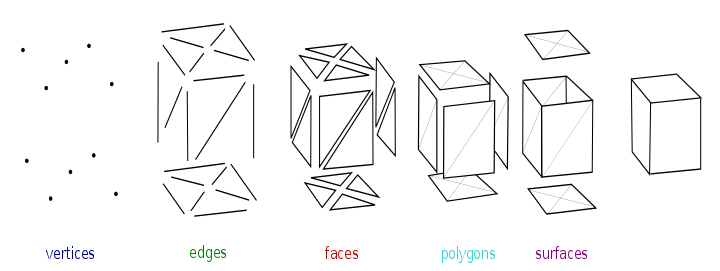

https://numpy-stl.readthedocs.io/en/latest/



**Vertices (вершины)** — список точек. Каждая точка описана тремя числами-координатами в 3-х мерном пространстве.

**Faces (грани)** — список граней. Каждая треугольная грань описана тремя вершинами, или точками. А точнее, позицией точек в массиве `vertices`.


**Mesh (сетка)** — набор вершин и граней, которые определяют форму многогранного объекта.

In [1]:
!pip install stl

  Preparing metadata (setup.py) ... done
  Created wheel for stl: filename=stl-0.0.3-py3-none-any.whl size=5339 sha256=e15480eae6f603301a8c1e9e280a6d1e166de8511d68e047ed7f529e7b95ccd2
  Stored in directory: /home/rituparn/.cache/pip/wheels/e5/ec/d8/f7563096d6e3563c236dd89ee682820474d594cd20bff73deb
Successfully built stl

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install numpy-stl

  Obtaining dependency information for numpy-stl from https://files.pythonhosted.org/packages/e0/14/39113ec023e601e6407e2fd203388e919c05ee8000d4d0ff23c76353f9b1/numpy_stl-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for python-utils>=3.4.5 from https://files.pythonhosted.org/packages/26/45/98431ba6d17b99468bd3f4c53fdeefff402167f006a06773905296f6d489/python_utils-3.8.2-py2.py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os

print("current path", os.getcwd())

os.chdir('/content/drive/MyDrive/Advanced ML course/Module 2/video/input')

print("current path", os.getcwd())

## Создание 3D-изображений

### Создание функций отображения

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import spatial

# Функция отображения вершин
def plot_verticles(vertices, isosurf = False, filename = None):
    # создание новой графики
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Отображение файла или запись файла
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


# Функция отображения сетки
def plot_mesh(
    your_mesh,
    size_x=10,
    size_y=10,
    dpi=80,
    filename = None
    ):
    # Создание нового 3D отображения
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    #axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    # Auto scale к размеру сетки
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Отображение и запись графика
    if filename is None:
        plt.show()
    else:
        #matplotlib.use('Agg')
        plt.savefig(filename)


ModuleNotFoundError: No module named 'matplotlib'

### Отображение пирамиды

In [ ]:
# Координаты вершины пирамиды
vertices = np.array(
    [
        [-3, -3, 0],
        [+3, -3, 0],
        [+3, +3, 0],
        [-3, +3, 0],
        [+0, +0, +3]
    ]
)


plot_verticles(vertices = vertices, isosurf = False)

In [ ]:
plot_verticles(vertices = vertices, isosurf = True)

### Отображение куба

In [ ]:
import numpy as np
from stl import mesh

# Определение 8 вершин куба
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])

# Определение 12 треугольников составляющих куб
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Создание сетки
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]



In [ ]:
# Запись сетки в файл  "cube.stl"
cube.save('cube.stl')

In [ ]:
plot_verticles(vertices = vertices, isosurf = False)

In [ ]:
plot_mesh(
    cube,
    size_x=5,
    size_y=5,
    dpi=80,
    filename = None
    )

### Отображение сферы

In [ ]:
def create_sphere(cx,cy,cz, r, resolution=36):
    resolution = 36
    phi = np.linspace(0, 2*np.pi, 2*resolution)
    theta = np.linspace(0, np.pi, resolution)



    r = 1
    cx =1
    cy =1
    cz =1
    vertices_=np.empty([0, 3])
    for p in phi:
      for t in theta:


        r_xy = r*np.sin(t)
        x = cx + np.cos(p) * r_xy
        y = cy + np.sin(p) * r_xy
        z = cz + r * np.cos(t)
        vertices_=np.append(vertices_,[[x,y,z]], axis=0)

    return vertices_

In [ ]:
vertices = create_sphere(1,1,1, 1, resolution=36)

vertices

In [ ]:
# Функция создание граней из вершин
hull = spatial.ConvexHull(vertices)
faces = hull.simplices # Массив faces содержит описание граней
faces

In [ ]:
myramid_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        myramid_mesh.vectors[i][j] = vertices[f[j],:]
plot_mesh(myramid_mesh)

### Работа с 3D-изображениями в формате STL

Загрузка 3D-изображения автомобилея в STL-формате:

In [ ]:
# Функция конвертации STL модели в Mesh3d
def stl2mesh3d(stl_mesh):
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    vertices, ixr = np.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = np.take(ixr, [3*k for k in range(p)])
    J = np.take(ixr, [3*k+1 for k in range(p)])
    K = np.take(ixr, [3*k+2 for k in range(p)])
    return vertices, I, J, K

In [ ]:
# Визуализация модели STL

import plotly
import numpy as np
from stl import mesh
import plotly.graph_objects as go
import urllib

my_mesh = mesh.Mesh.from_file('Tesla Model S.STL')


In [ ]:
vertices, I, J, K = stl2mesh3d(my_mesh)
x, y, z = vertices.T

In [ ]:
colorscale= [[0, '#555555'], [1, '#e5dee5']]
mesh3D = go.Mesh3d(
            x=x,
            y=y,
            z=z,
            i=I,
            j=J,
            k=K,
            flatshading=True,
            colorscale=colorscale,
            intensity=z,
            name='TESLA',
            showscale=False)


In [ ]:
title = "Mesh3d Tesla"
# Для исправления эффекта сплющивания используйте код
layout = go.Layout(paper_bgcolor='rgb(100,50,100)',
            title_text=title, title_x=0.5,
                   font_color='white',
            width=800,
            height=800,
            scene_camera=dict(eye=dict(x=1.25, y=-1.25, z=1)),
            scene_xaxis_visible=False,
            scene_yaxis_visible=False,
            scene_zaxis_visible=False,
            scene = dict(aspectratio = dict(
        x = 1,
        y = 2.5,
        z = 0.8
    )),


                   )

In [ ]:
fig = go.Figure(data=[mesh3D], layout=layout)
fig.show()

In [ ]:
fig = go.Figure(data=[mesh3D])
fig.show()

### Отображение 3D-изображения с окрашиванием

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/ply/sandal-ply.csv')
fig = go.Figure(go.Mesh3d(x=df.x, y=df.y, z=df.z, i=df.i, j=df.j, k=df.k, facecolor=df.facecolor))
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('tapok.csv')
fig = go.Figure(go.Mesh3d(x=df.x, y=df.y, z=df.z, i=df.i, j=df.j, k=df.k, facecolor=df.facecolor))
fig.show()

In [ ]:
df.info()

In [ ]:
df

Изменение цвета:

In [ ]:
df.facecolor ='red'

In [ ]:
fig = go.Figure(go.Mesh3d(x=df.x, y=df.y, z=df.z, i=df.i, j=df.j, k=df.k, facecolor=df.facecolor))
fig.show()

## Итоги

Разобрали примеры работы с 3D-визуализацией:
1. Отобразили различные 3D-фигуры (пирамида, куб, сфера).
2. Загрузили и отобразили 3D-изображение в формате STL.
3. Отобразили цвет на 3D-изображении, научились управлять цветом.

Что еще почитать

https://habr.com/ru/articles/572760/

https://www.kaggle.com/code/joey0201/centernet-baseline-with-map-valid-score/input

